# An International Cuisine Restaurant in a Toronto city

# Table of Contents

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3> 

<a href="##item1">1.Introduction</a>

> <a href="#item1">1.1 Background</a>
 
> <a href="#item1">1.2 Business Problem</a>

> <a href="#item1">1.3 Interest</a>

<a href="##item1">2. Data Acquisition And Cleaning </a>

<a href="##item1">3.Methodology and ML </a>

<a href="##item1">5.Results and Discussion </a>

<a href="##item1">6.Conclusion </a>

</font>
</div>








# 1. Introduction 


This report can help those who are planning to start a new business such as an international cuisine restaurant in Toronto city and need to find the best location for their shop.



## 1.1 Background

The number of population increases due to newborns and migration. Therefore demands are increasing in every areas.Such as demands of restaurants.

In addition, people's preferences and needs change day by day. For this reason, new shopping malls, shops, restaurants etc. are set up every day all over the world.

The population of Toronto is increasing. New restaurants are needed in this city. There are also different restaurants, which include different cuisine in Toronto.


Especially the central districts of the Toronto are becoming more and more become a shining star.

Since Toronto is a very important place, it attracts attention from very famous brands. Many famous brands want to be in Toronto. The entrepreneurs want to take advantage by having restaurants in the central of Toronto.


## 1.2 Business Problem

Unfortunately, it is not possible to access all kinds of data. Even if it is reached, it may take years to make sense of them with today's technology. therefore, it is necessary to collect the important data and make realistic assumptions when necessary.

Acceptances:

1. Restaurant customers are located around the available restaurants. And it is appropriate to specify these clients in the make_blobs method with cluster_std = 0.003.

2. Since it covers the world cuisines, it aspires to the customers of every available  restaurant.

3. Since the company wanted to open a place in the center, the information of the restaurants close to the center was used.

4. It is accepted that every restaurant has registered to the site where the data is received.


Since the restaurant is a world brand, it covers the world food and is a competitive company, it will increase the probability of success, rather than escaping from the center. Therefore, I need to find where the customer cluster is most concentrated.

The problem is :If the client want to open an international luxury cuisine restaurant in Toronto city, which point is the best option to open the restaurant?


## 1.3 Interest

Selecting the right location for a business is one of the first and very important decisions in running a business.

This report can help those who are planning to start a new business such as an international luxury cuisine restaurant in Toronto city and need to find the best location for their shop.

A world brand restaurant chain, which can better understand people's new wishes, is innovative, contains many world cuisines and can attract customers from existing restaurants, will want to make a place in Toronto. And they will want to know where the most suitable place is for this place. The customer will look for a location with the highest potential.

The company concerned is a company that wants to appeal to a large group of customers in the center, not to a small group of customers.



# 2. Data Acquisition And Cleaning 

I will extract the name of the neighborhoods of Toronto from the following link in Wikipedia:
'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'



I will help to eliminate bad choice areas for sellecting the most appropriate restaurant for client.


After that, I will use Foursquare API to get the information about the restaurants.The informations get extracted from the following link:
'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            
In accordance with the acceptance_1 using the restaurant coordinates, I will find the places where the customers are most intense. I will use cluster_std = 0.004 in the make_blobs method to find them.


I will find the most suitable region with the K-means-clustering method by using the places where the customers are the most crowded. I will find k in the K-means-clustering method that I will use here with estimate_bandwidth.


I will apply the K-Means Clustering method again in this region and find the center of this place. so I will find the best location of the best region.



In [78]:
import requests
import urllib.request
import time
#conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [122]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [196]:
row = soup.find('tbody') # Extract and return first occurrence of tbody
#Let's fix the data in a few commands below.
list_=row.get_text().split("\n")  # we try to get the writings. we do data separation from spaces.
list_[:20]

['',
 '',
 'M1ANot assigned',
 '',
 '',
 '',
 'M2ANot assigned',
 '',
 '',
 '',
 'M3ANorth York(Parkwoods)',
 '',
 '',
 '',
 'M4ANorth York(Victoria Village)',
 '',
 '',
 '',
 'M5ADowntown Toronto(Regent Park / Harbourfront)',
 '']

In [197]:
list_1=[]

for i in list_:
    if i!="":
        if (i[3:])!='Not assigned': #eliminating 'Not assigned' 
            list_1.append(i[3:])
print(list_1[:20])

['North York(Parkwoods)', 'North York(Victoria Village)', 'Downtown Toronto(Regent Park / Harbourfront)', 'North York(Lawrence Manor / Lawrence Heights)', "Queen's Park / Ontario Provincial Government", 'Etobicoke(Islington Avenue)', 'Scarborough(Malvern / Rouge)', 'North York(Don Mills)North', 'East York(Parkview Hill / Woodbine Gardens)', 'Downtown Toronto(Garden District, Ryerson)', 'North York(Glencairn)', 'Etobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)', 'Scarborough(Rouge Hill / Port Union / Highland Creek)', 'North York(Don Mills)South(Flemingdon Park)', 'East York(Woodbine Heights)', 'Downtown Toronto(St. James Town)', 'York(Humewood-Cedarvale)', 'Etobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood)', 'Scarborough(Guildwood / Morningside / West Hill)', 'East Toronto(The Beaches)']


In [198]:

borough=[]
for i in list_1:
  
    for j in range(len(i)):
        if i[j]=="(":
            borough.append(i[:j])
print(borough[:10])

['North York', 'North York', 'Downtown Toronto', 'North York', 'Etobicoke', 'Scarborough', 'North York', 'East York', 'Downtown Toronto', 'North York']


In [199]:
print(len(list_1),len(borough),sep="\n") 

103
104


There are a problem. The numbers is not aqual.

I found the missing data. Let's put it in its place.


In [200]:
borough.insert(4,"Queen's Park")
borough[:10]

['North York',
 'North York',
 'Downtown Toronto',
 'North York',
 "Queen's Park",
 'Etobicoke',
 'Scarborough',
 'North York',
 'East York',
 'Downtown Toronto']

In [202]:
df = pd.DataFrame()
df['Borough']=borough
df.head()

,Borough
0,North York
1,North York
2,Downtown Toronto
3,North York
4,Queen's Park


In [203]:
df.groupby(['Borough']).size()

Borough
Central Toronto                                                  9
Downtown Toronto                                                17
Downtown TorontoStn A PO Boxes25 The Esplanade                   1
East Toronto                                                     4
East TorontoBusiness reply mail Processing Centre969 Eastern     1
East York                                                        4
East YorkEast Toronto                                            1
Etobicoke                                                       11
EtobicokeNorthwest                                               1
MississaugaCanada Post Gateway Processing Centre                 1
North York                                                      24
North York(Don Mills)South                                       1
North York(Downsview)East                                        1
Queen's Park                                                     1
Scarborough                                           

In [204]:
#Let's correct the misspellings.
d = {'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto',
     'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto',
    'East YorkEast Toronto':'East York',
    'MississaugaCanada Post Gateway Processing Centre':'Mississauga',
    'EtobicokeNorthwest':'Etobicoke','North York(Don Mills)South':'North York',
    'North York(Downsview)East':'North York'}
df = df.replace(d)
df.groupby(['Borough']).size()

Borough
Central Toronto                 9
Downtown Toronto               18
East Toronto                    5
East York                       5
Etobicoke                      12
Mississauga                     1
North York                     25
North York(Downsview)East       1
Queen's Park                    1
Scarborough                    17
West Toronto                    6
York                            5
dtype: int64

In [205]:
list_=[]
for i in df["Borough"]:
    if i not in list_ and i!="North York(Downsview)East  ":
        list_.append(i)
print(list_)
borough=list_

['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke', 'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto', 'Central Toronto', 'Mississauga']


In [206]:
df = pd.DataFrame()
df['Borough']=list_
df

,Borough
0,North York
1,Downtown Toronto
2,Queen's Park
3,Etobicoke
4,Scarborough
5,East York
6,York
7,East Toronto
8,West Toronto
9,Central Toronto


In [207]:
#['Downtown Toronto', 'East Toronto', 'West Toronto', 'Central Toronto']
borough_coordinate_lat=[]
borough_coordinate_long=[]
for i in borough :
    address = [ (i+',Toronto, CA')]
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    lat = location.latitude
    lng = location.longitude
    borough_coordinate_lat.append(lat)
    borough_coordinate_long.append(lng)
print(borough_coordinate_lat)
print(borough_coordinate_long)

[43.7543263, 43.6563221, 43.659659, 43.671459150000004, 43.773077, 43.699971000000005, 43.67910515, 43.6247901, 43.653963, 43.653963, 43.6668555]
[-79.44911696639593, -79.3809161, -79.3903399, -79.55249206611668, -79.257774, -79.33251996261595, -79.49118414007154, -79.3934918, -79.387207, -79.387207, -79.5879563]


In [208]:
# lets combine Borough ,Latitude and Longitude informations
toronto_data = pd.DataFrame([borough,borough_coordinate_lat,borough_coordinate_long]).T
toronto_data.columns=['Borough', 'Latitude','Longitude']
toronto_data

,Borough,Latitude,Longitude
0,North York,43.7543,-79.4491
1,Downtown Toronto,43.6563,-79.3809
2,Queen's Park,43.6597,-79.3903
3,Etobicoke,43.6715,-79.5525
4,Scarborough,43.7731,-79.2578
5,East York,43.7,-79.3325
6,York,43.6791,-79.4912
7,East Toronto,43.6248,-79.3935
8,West Toronto,43.654,-79.3872
9,Central Toronto,43.654,-79.3872


In [209]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


let's see center of Borough

In [93]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
    
map_toronto

**Since our company will create a place in the center, let's eliminate it in small and remote places.**

In [ ]:
CLIENT_ID = '...............................' # your Foursquare ID
CLIENT_SECRET = '...........................' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [264]:

def getNearbyVenues(names, latitudes, longitudes, radius=30000):
    LIMIT=10
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print(url,results,venues_list,nearby_venues,sep="\n")
    
    return(nearby_venues)

In [265]:
toronto_venues = getNearbyVenues(names=toronto_data['Borough'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
print("done")

North York
Downtown Toronto
Queen's Park
Etobicoke
Scarborough
East York
York
East Toronto
West Toronto
Central Toronto
Mississauga
https://api.foursquare.com/v2/venues/explore?&client_id=3DY3IKVXYZDQFTBN3XEPQW2RWHSPCCFM0DRSLPS3YK1Z513O&client_secret=APLJQGA24KCQVXBBRG0ZNJ5EK2TWR21SCTL0VG2WLAXJ5PNY&v=20180605&ll=43.6668555,-79.5879563&radius=30000&limit=10
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4af4709bf964a52079f221e3', 'name': 'Porta Via', 'location': {'address': '5399 Eglinton Avenue West, Unit 104', 'crossStreet': 'btw Renforth & Commerce', 'lat': 43.66344890472386, 'lng': -79.58963815332794, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66344890472386, 'lng': -79.58963815332794}], 'distance': 402, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['5399 Eglinton Avenue West, Unit 104 (btw Renforth & Commerce)', 'Toronto ON', 'Can

In [267]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.754326,-79.449117,Earl Bales Park,43.753043,-79.436228,Park
1,North York,43.754326,-79.449117,Nordstrom,43.726054,-79.449443,Clothing Store
2,North York,43.754326,-79.449117,Maryam Hotel,43.766961,-79.401199,Hotel
3,North York,43.754326,-79.449117,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant
4,North York,43.754326,-79.449117,Crate & Barrel,43.726584,-79.452661,Furniture / Home Store


In [268]:
print(toronto_venues.shape)
toronto_venues.head()

(110, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.754326,-79.449117,Earl Bales Park,43.753043,-79.436228,Park
1,North York,43.754326,-79.449117,Nordstrom,43.726054,-79.449443,Clothing Store
2,North York,43.754326,-79.449117,Maryam Hotel,43.766961,-79.401199,Hotel
3,North York,43.754326,-79.449117,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant
4,North York,43.754326,-79.449117,Crate & Barrel,43.726584,-79.452661,Furniture / Home Store


In [233]:
toronto_venues_restorant=toronto_venues[:0]
for i in range(len(toronto_venues["Venue Category"])):
    if (toronto_venues["Venue Category"][i].find('Restaurant') != -1): 
        #print("Contains given substring ")
        #toronto_venues_restorant[i]=toronto_venues.iloc[i]
        toronto_venues_restorant=toronto_venues_restorant.append(toronto_venues.iloc[i], ignore_index=True)
    else: 
        pass
    
toronto_venues_restorant.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
22,Central Toronto,43.653963,-79.387207,Byblos Toronto,43.647615,-79.388381,Mediterranean Restaurant
23,Central Toronto,43.653963,-79.387207,Richmond Station,43.651569,-79.379266,American Restaurant
24,Mississauga,43.666855,-79.587956,Mrakovic,43.666641,-79.578850,Eastern European Restaurant
25,Mississauga,43.666855,-79.587956,Bravo Bistro,43.659420,-79.603604,Eastern European Restaurant
26,Mississauga,43.666855,-79.587956,The Keg Steakhouse + Bar - Dixon Road,43.686329,-79.597353,Restaurant


In [297]:
toronto_venues_restorant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.754326,-79.449117,Grill Gate,43.753123,-79.451690,Mediterranean Restaurant
1,North York,43.754326,-79.449117,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant
2,Downtown Toronto,43.656322,-79.380916,Richmond Station,43.651569,-79.379266,American Restaurant
3,Downtown Toronto,43.656322,-79.380916,Gyu-Kaku Japanese BBQ,43.651422,-79.375047,Japanese Restaurant
4,Queen's Park,43.659659,-79.390340,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican Restaurant
5,Etobicoke,43.671459,-79.552492,Mrakovic,43.666641,-79.578850,Eastern European Restaurant
6,Etobicoke,43.671459,-79.552492,"Ma Maison, Boulangerie - Patisserie - Traiteur",43.659490,-79.513624,French Restaurant
7,Etobicoke,43.671459,-79.552492,Kingsway Fish & Chips,43.647074,-79.513291,Seafood Restaurant
8,Etobicoke,43.671459,-79.552492,Azarias,43.647137,-79.513196,Tapas Restaurant
9,Etobicoke,43.671459,-79.552492,Bravo Bistro,43.659420,-79.603604,Eastern European Restaurant


In [386]:
list_centers=[]

for i in range(len(toronto_venues["Venue Longitude"])):
    list_h=[]
    list_h.append(toronto_venues["Venue Latitude"][i])
    list_h.append(toronto_venues["Venue Longitude"][i])
    list_centers.append(list_h)
list_centers[:10]

[[43.75304340101652, -79.43622849867882],
 [43.7260545, -79.4494431],
 [43.766961, -79.401199],
 [43.76016102214242, -79.40982686116466],
 [43.72658365, -79.45266115],
 [43.74696232135214, -79.407878758257],
 [43.80258190023286, -79.44874257686705],
 [43.703687730512435, -79.41348481516249],
 [43.692534923091934, -79.42870527613704],
 [43.71655100307589, -79.38777567141624]]

In [387]:
# intilize a null list 
unique_list = [] 
      
# traverse for all elements 
for x in list_centers: 
    # check if exists in unique_list or not 
    if x not in unique_list: 
        unique_list.append(x) 
print(len(list_centers),len(unique_list))
list_centers=unique_list  

110 68


In [388]:
#remote the duplicates
list_centers=unique_list

**In accordance with the acceptance_1 using the restaurant coordinates, let's find the places where the customers are most intense. I will use cluster_std = 0.004 in the make_blobs method to find them.**

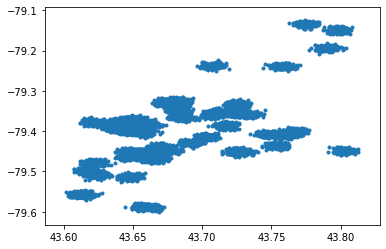

In [389]:
X, y = make_blobs(n_samples=15900, centers=list_centers, cluster_std=0.004)
plt.scatter(X[:, 0], X[:, 1], marker='.')



# 3. Methodology 

**Modelling : To help clients(who want to open an international luxury cuisine restaurant in a Toronto city ) find best point for opening an international luxury cuisine restaurant in a Toronto city. We will be clustering resourant customers using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size.**





#### K-Mean Clustering

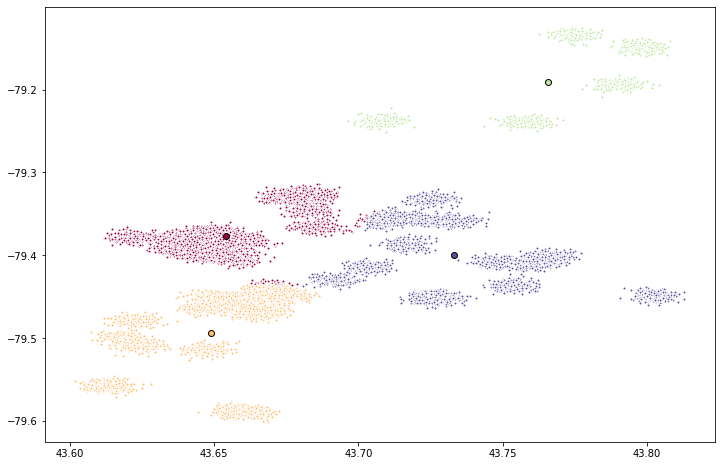

In [390]:
k_means3 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [391]:
k_means3.cluster_centers_

array([[ 43.65424027, -79.37651817],
       [ 43.64885088, -79.49317013],
       [ 43.76578057, -79.19053648],
       [ 43.7332646 , -79.39983345]])

number of estimated clusters : 5


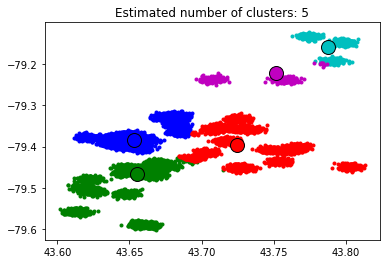

In [392]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

[-79.43658626797546, -79.44893376415678, -79.40092111916357, -79.41029977522504, -79.45318182074021] [43.753486764787475, 43.72601433650578, 43.766998882496864, 43.760752585537894, 43.727476118238826]


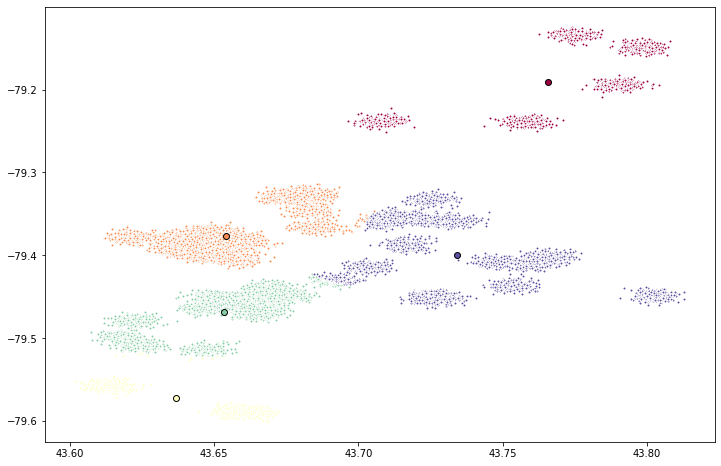

In [393]:
list_random_long=[]
list_random_lat=[]
import random

for i in range(10):
    for i in range(len(toronto_venues["Venue Longitude"])):
        list_random_long.append(toronto_venues["Venue Longitude"][i]+0.001*random.uniform(-1, 1))
        list_random_lat.append(toronto_venues["Venue Latitude"][i]+0.001*random.uniform(-1, 1))
print(list_random_long[:5],list_random_lat[:5])


list_centers2=[]

for i in range(len(list_random_long)):
    list_h=[]
    list_h.append(list_random_lat[i])
    list_h.append(list_random_long[i])
    list_centers2.append(list_h)
list_centers2[:10]



k_means3 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(
        X[:, 0], 
        X[:, 1], 
        toronto_venues['Neighborhood'], 
        toronto_venues['Venue']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
"""folium.Marker( location=[ k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1]], 
                         fill_color='#3186cc', radius=8 ).add_to( map_toronto )
  
"""
for i in k_means3.cluster_centers_:
    label = '{}, {}'.format("1", "2")
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [i[0],i[1]],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 



map_toronto  




#latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]



**Looking at the graphics, we are sure that it is more convenient to open the restaurant in the center of Toronto.
Since our company will create a place in the center, let's eliminate it in small and remote places.**


In [307]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_restorant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_restorant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,American Restaurant,Caribbean Restaurant,Eastern European Restaurant,Ethiopian Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Xinjiang Restaurant
0,North York,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,North York,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Downtown Toronto,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown Toronto,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Queen's Park,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [308]:
toronto_onehot.shape

(27, 16)

In [309]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,American Restaurant,Caribbean Restaurant,Eastern European Restaurant,Ethiopian Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Xinjiang Restaurant
0,Central Toronto,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.333333,0.0
1,Downtown Toronto,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,East York,0.500000,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Etobicoke,0.000000,0.0,0.400000,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.2,0.000000,0.0
4,Mississauga,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0


In [310]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood'][:5]:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Toronto----
                         venue  freq
0          American Restaurant  0.33
1     Mediterranean Restaurant  0.33
2              Thai Restaurant  0.33
3         Caribbean Restaurant  0.00
4  Eastern European Restaurant  0.00


----Downtown Toronto----
                         venue  freq
0          American Restaurant   0.5
1          Japanese Restaurant   0.5
2         Caribbean Restaurant   0.0
3  Eastern European Restaurant   0.0
4         Ethiopian Restaurant   0.0


----East York----
                         venue  freq
0          American Restaurant   0.5
1         Ethiopian Restaurant   0.5
2         Caribbean Restaurant   0.0
3  Eastern European Restaurant   0.0
4            French Restaurant   0.0


----Etobicoke----
                         venue  freq
0  Eastern European Restaurant   0.4
1            French Restaurant   0.2
2           Seafood Restaurant   0.2
3             Tapas Restaurant   0.2
4          American Restaurant   0.0


----Mississauga----

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [311]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**let's find 4 Most Common Venue in Neighborhood**

In [312]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Central Toronto,Thai Restaurant,Mediterranean Restaurant,American Restaurant,Xinjiang Restaurant
1,Downtown Toronto,Japanese Restaurant,American Restaurant,Xinjiang Restaurant,Thai Restaurant
2,East York,Ethiopian Restaurant,American Restaurant,Xinjiang Restaurant,Thai Restaurant
3,Etobicoke,Eastern European Restaurant,Tapas Restaurant,Seafood Restaurant,French Restaurant
4,Mississauga,Eastern European Restaurant,Restaurant,Xinjiang Restaurant,Thai Restaurant


let's eliminate bad choice areas for sellecting the most appropriate restaurant for client.

In [319]:
list_1=['Downtown Toronto','East Toronto', 'West Toronto', 'Central Toronto']
list_2=[]
list_3=[]
list_4=[]
for i in range(len(toronto_data['Borough'])):
    if toronto_data['Borough'][i] in list_1:
        list_2.append(toronto_data['Borough'][i])
        list_3.append(toronto_data['Latitude'][i])
        list_4.append(toronto_data['Longitude'][i])


In [320]:
toronto_data = pd.DataFrame([list_2,list_3,list_4]).T
toronto_data.columns=['Borough', 'Latitude','Longitude']
toronto_data

,Borough,Latitude,Longitude
0,Downtown Toronto,43.6563,-79.3809
1,East Toronto,43.6248,-79.3935
2,West Toronto,43.654,-79.3872
3,Central Toronto,43.654,-79.3872


there is same West Toronto and Central Toronto. for that reason i will delete duplicate.


In [321]:
toronto_data = pd.DataFrame([list_2[:3],list_3[:3],list_4[:3]]).T
toronto_data.columns=['Borough', 'Latitude','Longitude']
toronto_data

,Borough,Latitude,Longitude
0,Downtown Toronto,43.6563,-79.3809
1,East Toronto,43.6248,-79.3935
2,West Toronto,43.654,-79.3872


**I will repeat the process according to the changing situation.**

In [322]:
toronto_venues
    

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.754326,-79.449117,Earl Bales Park,43.753043,-79.436228,Park
1,North York,43.754326,-79.449117,Nordstrom,43.726054,-79.449443,Clothing Store
2,North York,43.754326,-79.449117,Maryam Hotel,43.766961,-79.401199,Hotel
3,North York,43.754326,-79.449117,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant
4,North York,43.754326,-79.449117,Crate & Barrel,43.726584,-79.452661,Furniture / Home Store
5,North York,43.754326,-79.449117,Auberge du Pommier,43.746962,-79.407879,French Restaurant
6,North York,43.754326,-79.449117,Amadeus Fine Cakes,43.802582,-79.448743,Dessert Shop
7,North York,43.754326,-79.449117,The Abbot,43.703688,-79.413485,Gastropub
8,North York,43.754326,-79.449117,Cedarvale Park,43.692535,-79.428705,Field
9,North York,43.754326,-79.449117,Sherwood Park,43.716551,-79.387776,Park


In [340]:
list_centers2=[]
list_centersN=[]

for k in range(len(toronto_venues["Venue Longitude"])):
    list_h=[]
    list_h.append(toronto_venues["Venue Latitude"][k])
    list_h.append(toronto_venues["Venue Longitude"][k])
    list_centersN.append(toronto_venues["Neighborhood"][k])
    list_centers2.append(list_h)
print(list_centers2[:5],list_centersN[:5])

[[43.75304340101652, -79.43622849867882], [43.7260545, -79.4494431], [43.766961, -79.401199], [43.76016102214242, -79.40982686116466], [43.72658365, -79.45266115]] ['North York', 'North York', 'North York', 'North York', 'North York']


In [343]:
list_centers3=[]
for i in list_centersN:
    if i in ['Downtown Toronto','East Toronto', 'West Toronto']:
        list_centers3.append(i)
list_center=list_centers3
list_center[::3]

['Downtown Toronto',
 'Downtown Toronto',
 'Downtown Toronto',
 'Downtown Toronto',
 'East Toronto',
 'East Toronto',
 'East Toronto',
 'West Toronto',
 'West Toronto',
 'West Toronto']

In [352]:
list_centers2=[]
list_centersN=[]

for i in range(len(toronto_venues["Neighborhood"])):
     if toronto_venues["Neighborhood"][i] in ['Downtown Toronto','East Toronto', 'West Toronto']:
        list_h=[]
        list_h.append(toronto_venues["Venue Latitude"][i])
        list_h.append(toronto_venues["Venue Longitude"][i])
        list_centersN.append(toronto_venues["Neighborhood"][i])
        list_centers2.append(list_h)
list_centers=list_centers2
list_centers[:3]

[[43.65323167517444, -79.38529600606677],
 [43.65591027779457, -79.38064099181345],
 [43.65883296982352, -79.38368351986598]]

In [353]:
# intilize a null list 
unique_list = [] 
      
# traverse for all elements 
for x in list_centers: 
    # check if exists in unique_list or not 
    if x not in unique_list: 
        unique_list.append(x) 
print(len(list_centers),len(unique_list))
list_centers=unique_list 

30 23


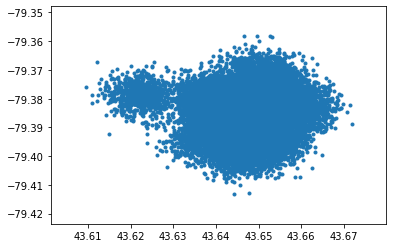

In [374]:
X, y = make_blobs(n_samples=15900, centers=list_centers, cluster_std=0.004)
plt.scatter(X[:, 0], X[:, 1], marker='.')

number of estimated clusters : 2


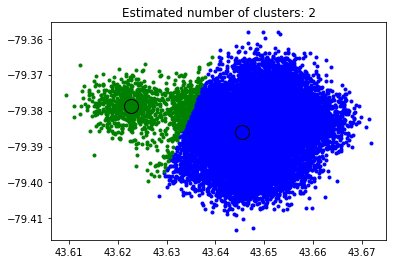

In [375]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

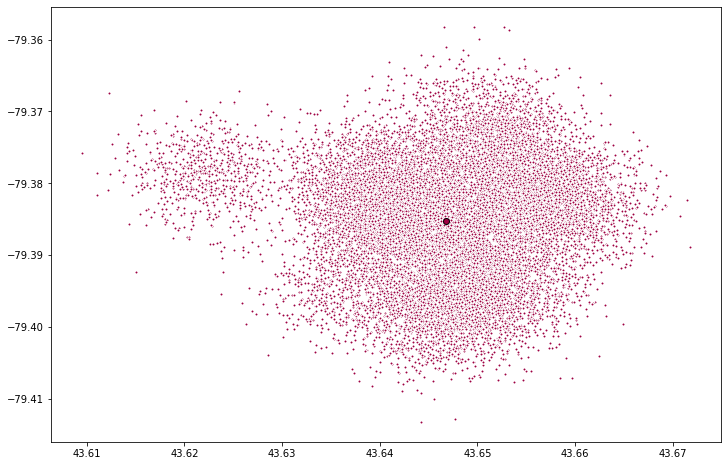

In [381]:
k_means3 = KMeans(init = "k-means++", n_clusters = 1, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


In [382]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(
        X[:, 0], 
        X[:, 1], 
        toronto_venues['Neighborhood'], 
        toronto_venues['Venue']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
"""folium.Marker( location=[ k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1],
                             k_means3.cluster_centers_[:1]], 
                         fill_color='#3186cc', radius=8 ).add_to( map_toronto )
  
"""
for i in k_means3.cluster_centers_:
    label = '{}, {}'.format("1", "2")
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [i[0],i[1]],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 



map_toronto  






In [383]:
k_means3.cluster_centers_

array([[ 43.64677691, -79.38528159]])


# 4. Results and Discussion

**From the result of first clustering algorithm, it was determined 5 centers were the best choise for opening an international luxury cuisine restaurant.**

**Looking at the graphics, we are sure that it is more convenient to open the restaurant in the center of Toronto. Since our company will create a place in the center, so I eliminated it in small and remote places. And I selected the best area according to the chart.**

**From the result of second clustering algorithm, it was determined 1 centers were the best choise for opening an international luxury cuisine restaurant.**

**My advice to the customer is to determine the places that are suitable to open a restaurant near the point I found, and then choose the most suitable place for these points by calculating.**

**In addition, customer experience should be used and acceptance should be made more accurately, so that the correct result can be approached more.(unfortunately, I could not benefit from the customer experience in this project.)**

**The presence of restaurants that are available in the area and not registered with foursquare will increase the probability of success.**

**I also showed the types of restaurants in the area. Finding successful cooks especially in these types will increase the success of the business.**



# 5. Conclusion


**Opening a new international luxury cuisine restaurant is a complex task that can lead to a large monetary loss if not done properly. Thus, extensive research about the area would greatly get bigger  the likelihood of the restourant succeding. From the project above, I revealed the workflow neccessary for the client to determine what area the restourant should open.for specially, I determined that the optimal location to open an international luxury cuisine restaurant in Toronto shoul be that (k_means3.cluster_centers_) point.** 